# Worksheet 02

Name: Hrishav Varma

UID: U57996211

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

Since the top down approach starts with a broad view of the problem that is being solved, there's a risk of overlooking important details when we get to lower levels. This can lead to incomplete or inefficient solutions.

b) What is a drawback of the bottom up approach?

One drawback of bottom up appraoch would be that since the focus is on building individual components, there's a risk of overlooking design decisions such as how these pieces would fit into the larger system and scalability and usability of the components.

c) What are 3 things you can do to have a better debugging experience?

Three things you can do to have a better debugging experience:

1. Write modular code and have it unit tested.
2. Use version control like Git so you can have better development cycles.
3. Use descriptive and meaningful varialbe names and function names along with comments to make the code readable.

d) (Optional) Follow along with the live coding. You can write your code here:

## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [158]:
import pandas as pd

df = pd.read_csv("train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [159]:
print("there are " +  str(df.isnull().any(axis=1).sum()) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [160]:
df.drop(columns=df.columns.values[df.isnull().sum()>200], inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [161]:
df['Sex'] = df["Sex"].replace({"male": 0, "female": 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [162]:
df[['Last Name', 'Title', 'First Name', 'Middle Name']] = df['Name'].str.extract(r'^([^,]+),\s*([^ ]*)\s*([^ ]*)\s*([^ ]*)')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr.,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs.,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss.,Laina,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Futrelle,Mrs.,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Allen,Mr.,William,Henry


f) Complete the code below to replace all missing ages with the average age

29.7

In [181]:
df['Age'].fillna(round(df['Age'].mean(),1), inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr.,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs.,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss.,Laina,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Futrelle,Mrs.,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Allen,Mr.,William,Henry


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

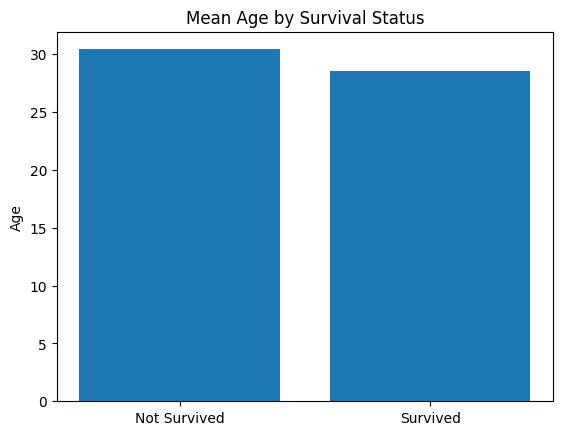

In [206]:
import matplotlib.pyplot as plt

mean_age_by_survival_status = df.groupby('Survived')['Age'].mean()
plt.bar(mean_age_by_survival_status.index, mean_age_by_survival_status.values)

plt.xticks(mean_age_by_survival_status.index, ['Not Survived', 'Survived'])
plt.ylabel('Age')
plt.title('Mean Age by Survival Status')
plt.show()

We can observe a slight difference between the mean ages of the people who survived versus the people who did not. But what also should be kept in mind that in one of the previous steps, the people who did not have a age listed in the data was replaced with the mean age of the people who had an entry for their age in the dataset. Hence, it could have an effect on the above bar chart as the sample of people who did not have an age listed be part of one group heavily and hence their age statistics being heavily swayed from the reality as the mean age would be from the other group.